# DIABETICS PREDICTION

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# load dataset

In [2]:
df=pd.read_csv('D:\\New folder\\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# returns number of rows and columns of dataset
df.shape   

(768, 9)

In [4]:
# returns basic information on all columns
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Returns column having missimg  values
df.isna().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Returns basic statistics on numeric columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

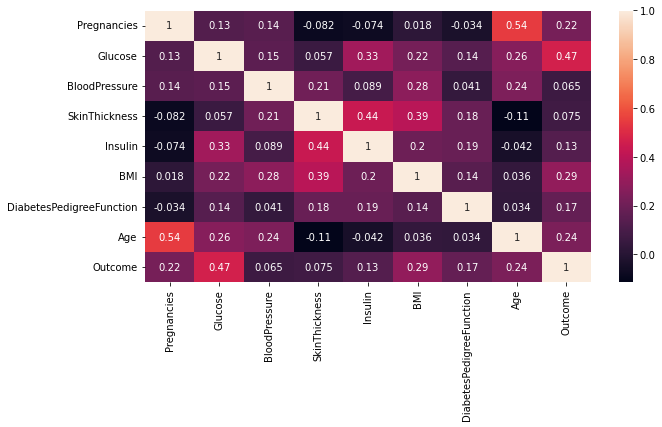

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True) #shows the heatmap

Text(0.5, 1.0, 'boxplot of Pregnancies')

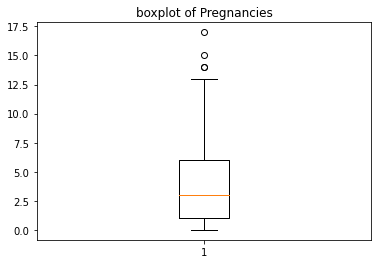

In [12]:
#Returns the outliers
plt.boxplot(df['Pregnancies'])
plt.title('boxplot of Pregnancies')

Text(0.5, 1.0, 'boxplot of Glucose')

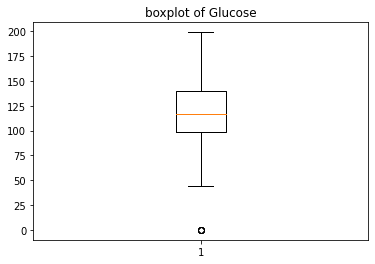

In [13]:
plt.boxplot(df['Glucose'])
plt.title('boxplot of Glucose')

In [14]:
Q1=np.percentile(df['Glucose'],25,interpolation='midpoint')
Q2=np.percentile(df['Glucose'],50,interpolation='midpoint')
Q3=np.percentile(df['Glucose'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

99.0
117.0
140.5


In [15]:
df['Glucose'].median()

117.0

In [16]:
IQR=Q3-Q1
print(IQR)

41.5


In [17]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

202.75
36.75


In [18]:
outlier=[]
for x in df['Glucose']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
outlier

[0, 0, 0, 0, 0]

In [19]:
df1=((df['Glucose']>upper_limit)|(df['Glucose']<lower_limit))
df1

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool

In [20]:
df2=df.loc[df1]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [21]:
df.drop(df2.index,axis=0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'boxplot of BloodPressure')

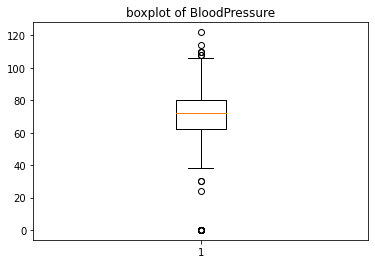

In [22]:
plt.boxplot(df['BloodPressure'])
plt.title('boxplot of BloodPressure')

In [23]:
Q1=np.percentile(df['BloodPressure'],25,interpolation='midpoint')
Q2=np.percentile(df['BloodPressure'],50,interpolation='midpoint')
Q3=np.percentile(df['BloodPressure'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

62.0
72.0
80.0


In [24]:
df['BloodPressure'].median()

72.0

In [25]:
IQR=Q3-Q1
print(IQR)

18.0


In [26]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

107.0
35.0


In [27]:
outlier=[]
for x in df['BloodPressure']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
outlier

[0,
 0,
 30,
 110,
 0,
 0,
 0,
 0,
 108,
 122,
 30,
 0,
 110,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 108,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 110,
 0,
 24,
 0,
 0,
 0,
 0,
 114,
 0,
 0,
 0]

In [28]:
df3=((df['BloodPressure']>upper_limit)|(df['BloodPressure']<lower_limit))
df3

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 763, dtype: bool

In [29]:
df4=df.loc[df3]
df4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


In [30]:
df.drop(df4.index,axis=0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'boxplot of DiabetesPedigreeFunction')

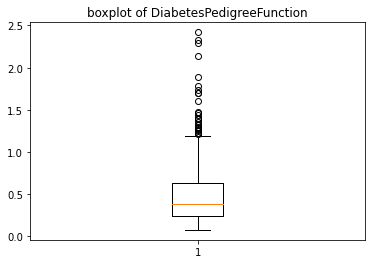

In [31]:
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.title('boxplot of DiabetesPedigreeFunction')

In [32]:
Q1=np.percentile(df['DiabetesPedigreeFunction'],25,interpolation='midpoint')
Q2=np.percentile(df['DiabetesPedigreeFunction'],50,interpolation='midpoint')
Q3=np.percentile(df['DiabetesPedigreeFunction'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.245
0.3805
0.63


In [33]:
IQR=Q3-Q1
print(IQR)

0.385


In [34]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

1.2075
-0.3325


In [35]:
outlier=[]
for x in df['DiabetesPedigreeFunction']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
outlier

[2.288,
 1.441,
 1.39,
 1.893,
 1.781,
 1.222,
 1.4,
 1.321,
 1.224,
 2.329,
 1.318,
 1.213,
 1.353,
 1.224,
 1.391,
 1.476,
 2.137,
 1.731,
 1.268,
 1.6,
 2.42,
 1.251,
 1.699,
 1.258,
 1.282,
 1.698,
 1.461,
 1.292,
 1.394]

In [36]:
df5=((df['DiabetesPedigreeFunction']>upper_limit)|(df['DiabetesPedigreeFunction']<lower_limit))
df5

0      False
1      False
2      False
3      False
4       True
       ...  
763    False
764    False
765    False
766    False
767    False
Name: DiabetesPedigreeFunction, Length: 718, dtype: bool

In [37]:
df6=df.loc[df5]
df6

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [38]:
df.drop(df6.index,axis=0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'boxplot of BMI')

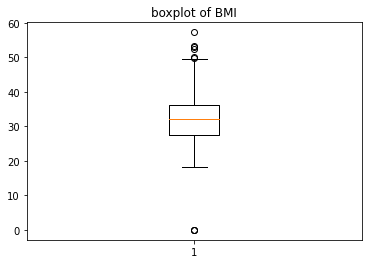

In [39]:
plt.boxplot(df['BMI'])
plt.title('boxplot of BMI')

In [40]:
Q1=np.percentile(df['BMI'],25,interpolation='midpoint')
Q2=np.percentile(df['BMI'],50,interpolation='midpoint')
Q3=np.percentile(df['BMI'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

27.4
32.1
36.3


In [41]:
IQR=Q3-Q1
print(IQR)

8.899999999999999


In [42]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

49.64999999999999
14.05


In [43]:
outlier=[]
for x in df['BMI']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
outlier

[0.0, 49.7, 53.2, 0.0, 50.0, 52.3, 52.9, 57.3, 0.0]

In [44]:
df7=((df['BMI']>upper_limit)|(df['BMI']<lower_limit))
df7

0      False
1      False
2      False
3      False
5      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BMI, Length: 689, dtype: bool

In [45]:
df8=df.loc[df7]
df8

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
99,1,122,90,51,220,49.7,0.325,31,1
120,0,162,76,56,100,53.2,0.759,25,1
145,0,102,75,23,0,0.0,0.572,21,0
155,7,152,88,44,0,50.0,0.337,36,1
247,0,165,90,33,680,52.3,0.427,23,0
303,5,115,98,0,0,52.9,0.209,28,1
673,3,123,100,35,240,57.3,0.880,22,0
684,5,136,82,0,0,0.0,0.640,69,0


In [46]:
df.drop(df8.index,axis=0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'boxplot of Age')

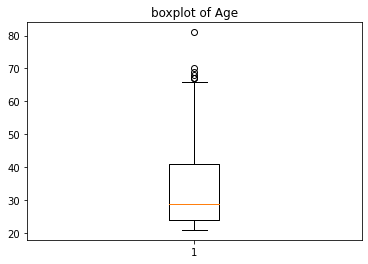

In [47]:
plt.boxplot(df['Age'])
plt.title('boxplot of Age')

In [48]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

24.0
29.0
41.0


In [49]:
IQR=Q3-Q1
print(IQR)

17.0


In [50]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

66.5
-1.5


In [51]:
outlier=[]
for x in df['Age']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)
outlier

[69, 67, 81, 67, 67, 70, 68]

In [52]:
df9=((df['Age']>upper_limit)|(df['Age']<lower_limit))
df9

0      False
1      False
2      False
3      False
5      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Age, Length: 680, dtype: bool

In [53]:
df10=df.loc[df9]
df10

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0


In [54]:
df.drop(df10.index,axis=0,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

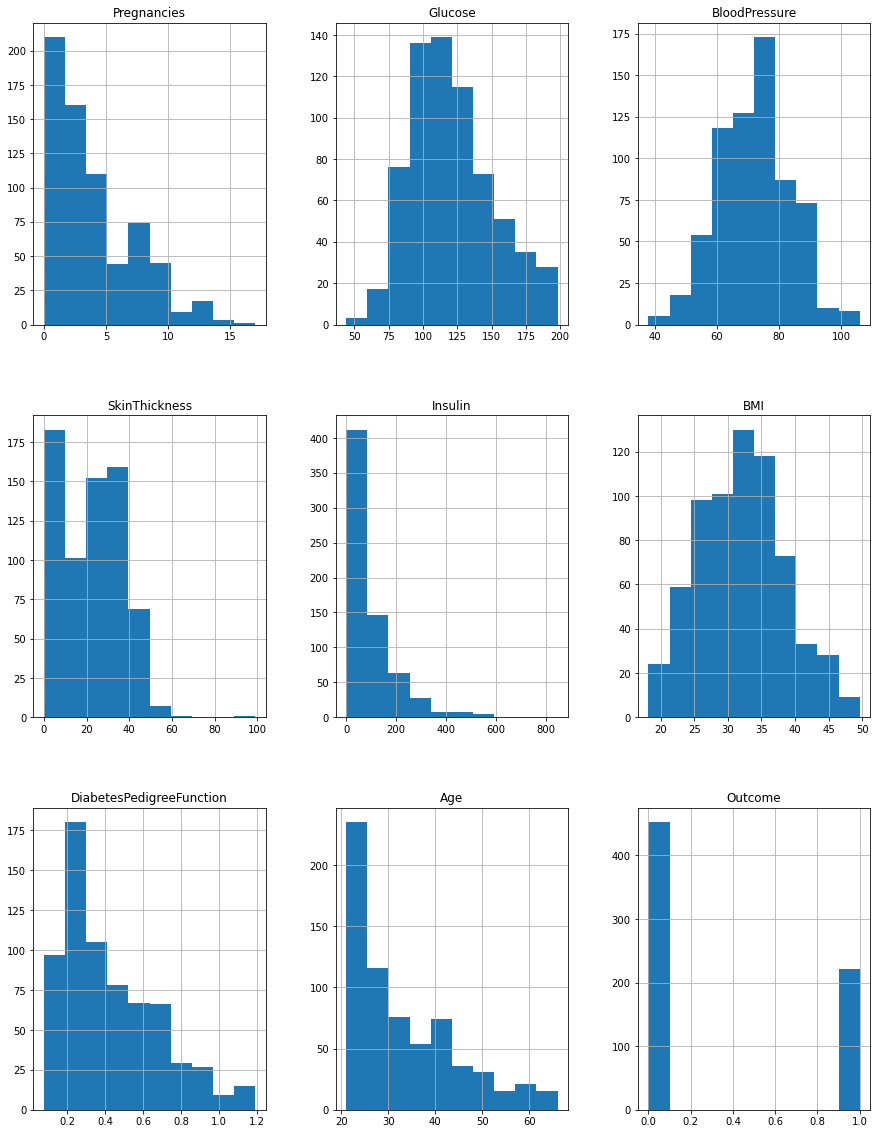

In [55]:
#plotting histogram
df.hist(figsize=(15,20)) 
plt.show

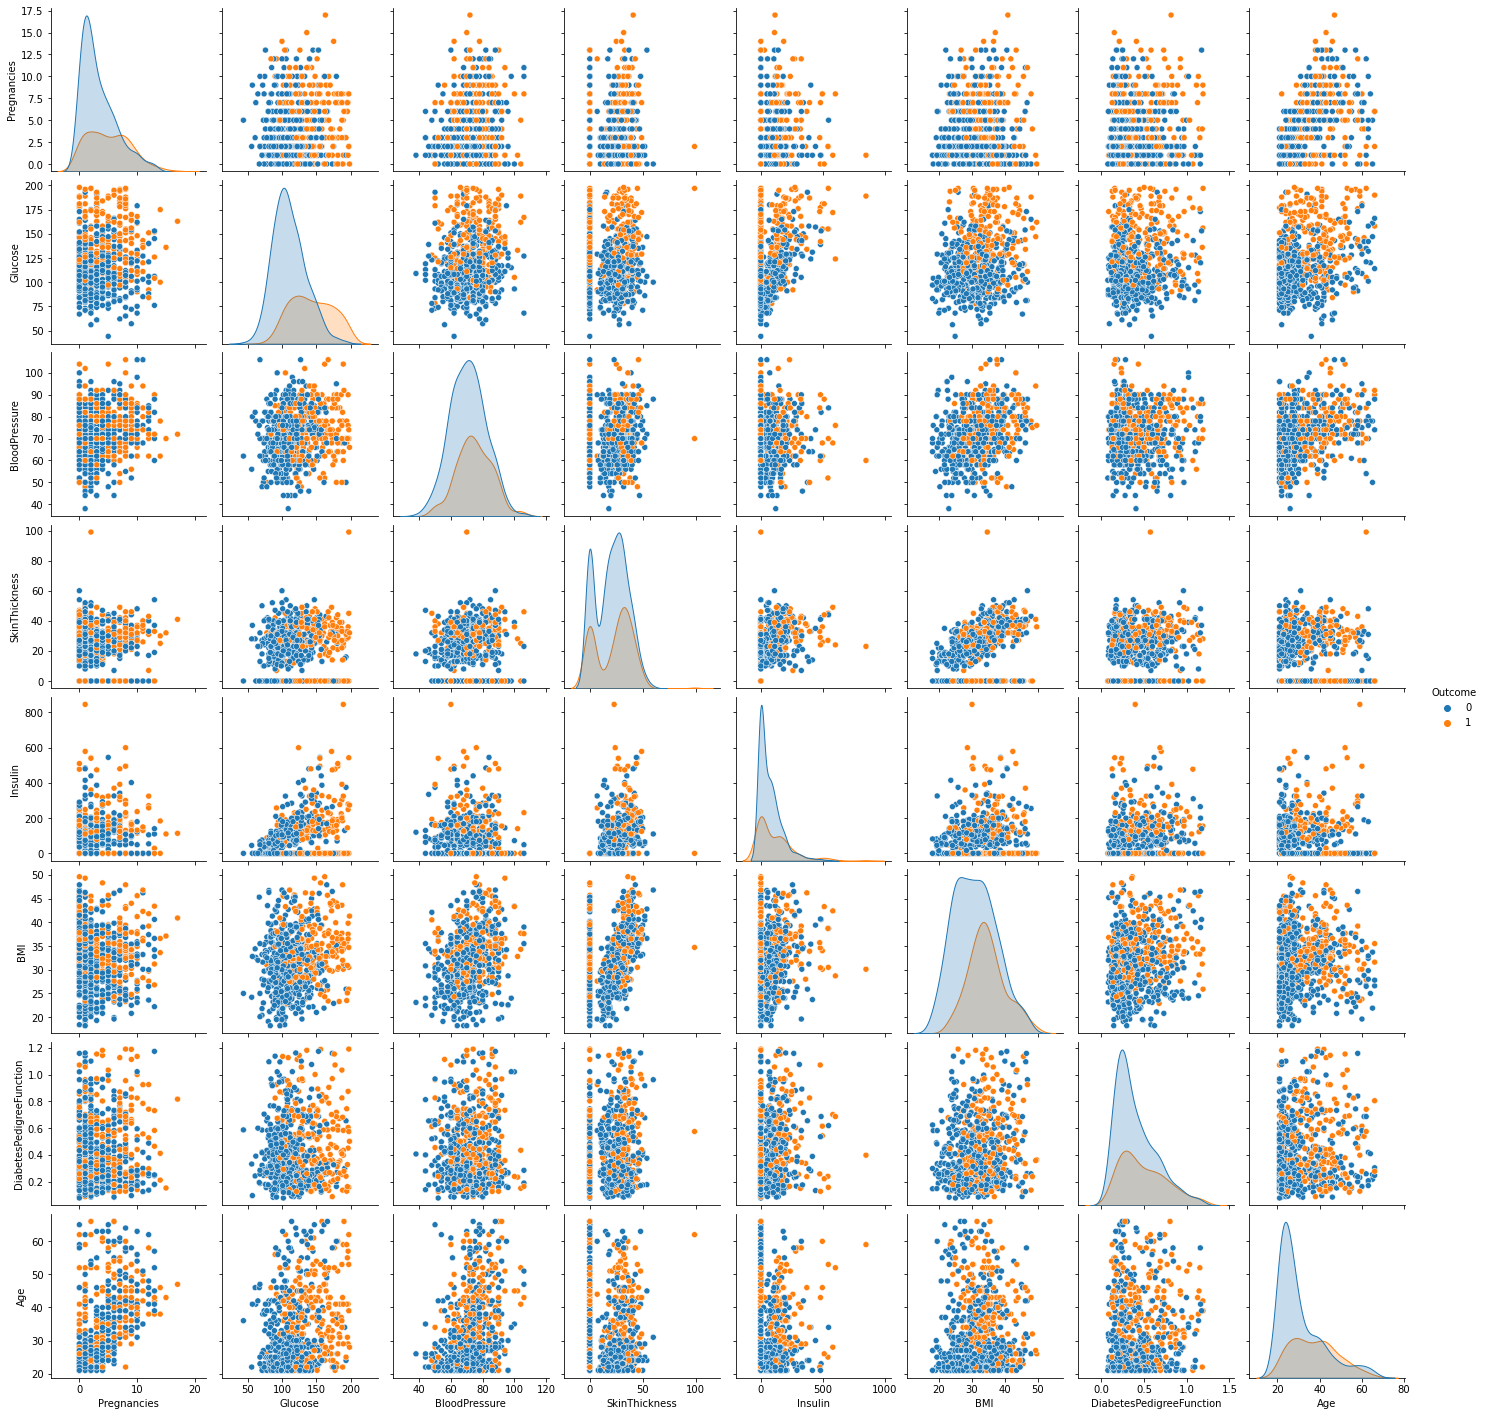

In [56]:
sns.pairplot(df,hue='Outcome')

In [57]:
df['Outcome'].value_counts()

0    452
1    221
Name: Outcome, dtype: int64

In [58]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [59]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [60]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [61]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 673, dtype: int64

In [62]:
#split the data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODEL CREATION AND EVALUATION

# LOGISTIC REGRESSION

In [64]:

lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

print(confusion_matrix(y_test,y_pred_lr))

[[82  9]
 [19 25]]


In [65]:
print(accuracy_score(y_test,y_pred_lr))

0.7925925925925926


In [66]:
print(f1_score(y_test,y_pred_lr))

0.641025641025641


In [67]:
print(precision_score(y_test,y_pred_lr))

0.7352941176470589


In [68]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        91
           1       0.74      0.57      0.64        44

    accuracy                           0.79       135
   macro avg       0.77      0.73      0.75       135
weighted avg       0.79      0.79      0.78       135



# SVM

In [69]:

svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
y_predsvm=svm_model.predict(x_test)

print(confusion_matrix(y_test,y_predsvm))

[[82  9]
 [19 25]]


In [70]:
print(accuracy_score(y_test,y_predsvm))

0.7925925925925926


In [71]:
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        91
           1       0.74      0.57      0.64        44

    accuracy                           0.79       135
   macro avg       0.77      0.73      0.75       135
weighted avg       0.79      0.79      0.78       135



In [72]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(x_train,y_train)
y_predsvm=svm_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_predsvm))

[[83  8]
 [21 23]]


In [73]:
print(accuracy_score(y_predsvm,y_test))

0.7851851851851852


In [74]:
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        91
           1       0.74      0.52      0.61        44

    accuracy                           0.79       135
   macro avg       0.77      0.72      0.73       135
weighted avg       0.78      0.79      0.77       135



In [75]:
svm_clf=SVC(kernel='poly')
svm_model=svm_clf.fit(x_train,y_train)
y_predsvm=svm_model.predict(x_test)

print(confusion_matrix(y_test,y_predsvm))

[[85  6]
 [30 14]]


In [76]:
print(accuracy_score(y_predsvm,y_test))

0.7333333333333333


In [77]:
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        91
           1       0.70      0.32      0.44        44

    accuracy                           0.73       135
   macro avg       0.72      0.63      0.63       135
weighted avg       0.73      0.73      0.70       135



In [78]:
print(precision_score(y_test,y_predsvm))

0.7


In [79]:
print(f1_score(y_test,y_predsvm))

0.4375


# DECISIONTREE CLASSIFIER

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt=dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
y_pred_dt

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [81]:
print(confusion_matrix(y_test,y_pred_dt))

[[70 21]
 [25 19]]


In [82]:
print(accuracy_score(y_test,y_pred_dt))

0.6592592592592592


In [83]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        91
           1       0.47      0.43      0.45        44

    accuracy                           0.66       135
   macro avg       0.61      0.60      0.60       135
weighted avg       0.65      0.66      0.65       135



In [84]:
print(precision_score(y_test,y_pred_dt))

0.475


In [85]:
print(f1_score(y_test,y_pred_dt))

0.4523809523809524


# RANDOMFOREST CLASSIFIER

In [86]:
rf=RandomForestClassifier()
model_rf=rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [87]:
print(confusion_matrix(y_test,y_pred_rf))

[[78 13]
 [21 23]]


In [88]:
print(accuracy_score(y_test,y_pred_rf))

0.7481481481481481


In [89]:
print(f1_score(y_test,y_pred_rf))

0.575


In [90]:
print(precision_score(y_test,y_pred_rf))

0.6388888888888888


In [91]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        91
           1       0.64      0.52      0.57        44

    accuracy                           0.75       135
   macro avg       0.71      0.69      0.70       135
weighted avg       0.74      0.75      0.74       135



# BOOSTING

# ADABOOSTCLASSIFIER

In [92]:
ada=AdaBoostClassifier()
model_ada=ada.fit(x_train,y_train)
y_pred_ada=model_ada.predict(x_test)
y_pred_ada

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [93]:
print(confusion_matrix(y_test,y_pred_ada))

[[80 11]
 [18 26]]


In [94]:
print(precision_score(y_test,y_pred_ada))

0.7027027027027027


In [95]:
print(accuracy_score(y_test,y_pred_ada))

0.7851851851851852


In [96]:
print(f1_score(y_test,y_pred_ada))

0.6419753086419754


In [97]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        91
           1       0.70      0.59      0.64        44

    accuracy                           0.79       135
   macro avg       0.76      0.74      0.74       135
weighted avg       0.78      0.79      0.78       135



# GRADIENTBOOSTING CLASSIFIER

In [98]:
gbc=GradientBoostingClassifier()
model_gbc=gbc.fit(x_train,y_train)
y_pred_gbc=model_gbc.predict(x_test)
y_pred_gbc

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [99]:
print(confusion_matrix(y_test,y_pred_gbc))

[[78 13]
 [21 23]]


In [100]:
print(precision_score(y_test,y_pred_gbc))

0.6388888888888888


In [101]:
print(f1_score(y_test,y_pred_gbc))

0.575


In [102]:
print(accuracy_score(y_test,y_pred_gbc))

0.7481481481481481


In [103]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        91
           1       0.64      0.52      0.57        44

    accuracy                           0.75       135
   macro avg       0.71      0.69      0.70       135
weighted avg       0.74      0.75      0.74       135



# XGBOOST CLASSIFIER

In [104]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_xgb=xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
y_pred_xgb

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1])

In [105]:
print(confusion_matrix(y_test,y_pred_xgb))

[[75 16]
 [17 27]]


In [106]:
print(accuracy_score(y_test,y_pred_xgb))

0.7555555555555555


In [107]:
print(f1_score(y_test,y_pred_xgb))

0.6206896551724139


In [108]:
print(precision_score(y_test,y_pred_xgb))

0.627906976744186


In [109]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        91
           1       0.63      0.61      0.62        44

    accuracy                           0.76       135
   macro avg       0.72      0.72      0.72       135
weighted avg       0.75      0.76      0.75       135



In [110]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model_knn=knn.fit(x_train,y_train)
    y_pred_knn=model_knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [111]:
metric_k

[0.7185185185185186,
 0.7333333333333333,
 0.7407407407407407,
 0.7333333333333333,
 0.7777777777777778,
 0.7185185185185186,
 0.7481481481481481,
 0.7481481481481481,
 0.762962962962963,
 0.762962962962963,
 0.7777777777777778,
 0.7851851851851852]

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

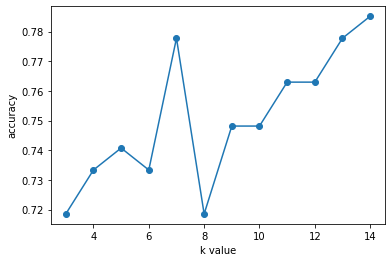

In [112]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

In [113]:
#creating model by using k=14
knn=KNeighborsClassifier(n_neighbors=14)
model_knn=knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [114]:
print(confusion_matrix(y_test,y_pred_knn))

[[88  3]
 [26 18]]


In [115]:
print(accuracy_score(y_test,y_pred_knn))

0.7851851851851852


In [116]:
print(f1_score(y_test,y_pred_knn))

0.5538461538461539


In [117]:
print(precision_score(y_test,y_pred_knn))

0.8571428571428571


In [118]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        91
           1       0.86      0.41      0.55        44

    accuracy                           0.79       135
   macro avg       0.81      0.69      0.71       135
weighted avg       0.80      0.79      0.76       135



# ACCURACY  COMPARISON BETWEEN MODELS

LOGISTIC REGRESSION-79.25%
SVM(kernel=rbf)-78.5%
SVM(kernel=linear)-79.2%
SVM(kernel=poly)-73.3%
DECISIONTREE CLASSIFIER-69.6%
RANDOMFORESTCLASSIFIER-78.5%
ADABOOSTCLASSIFIER-78.5%
GRADIENTBOOSTINGCLASSIFIER-73.3%
XGB CLASSIFIER-75.5%
KNN CLASSIFIER-78.5%

ABOVE THE MODELS LOGISTIC REGRESSION HAVING HIGHEST ACCUARACY

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [120]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# PREDICTION

In [121]:
new_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
new_data_scaled = sc.transform(new_data)
prediction = model_lr.predict(new_data_scaled)
print("Prediction for new data:", prediction)

Prediction for new data: [1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [122]:
new_data = [[10,101,76,48,180,32.9,0.171,63]]
new_data_scaled = sc.transform(new_data)
prediction = model_lr.predict(new_data_scaled)
print("Prediction for new data:", prediction)

Prediction for new data: [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
